## Brief description of the data set and a summary of its attributes

In this project, I have performed exploratory data analysis over NESTLE INDIA stock dataset traded over NSE in last 11 years.

link of stock - https://in.finance.yahoo.com/quote/NESTLEIND.NS?p=NESTLEIND.NS&.tsrc=fin-srch

Link to dataset - https://www.kaggle.com/rohanrao/nifty50-stock-market-data?select=NESTLEIND.csv

It contains 15 columns out of 7 will be mainly used for analysis which are described below
(Each row defines a day of trading):

**Date** - Date on which trading occured

**Prev Close** - Closing price of stock traded on previous trading day

**Close** - Closing price of stock traded today

**Volume** - Volume is the number of shares of a security traded during a given period of time (in a day).

**VWAP** - Volume weighted average price. The volume weighted average price helps in comparing the current price of the stock to            a benchmark, making it easier for investors to make decisions on when to enter and exit the market.

**Deliverable Volume** - Deliverable Volume is the quantity of shares which actually move from one set of people (who had those shares in their demat account before today and are selling today) to another set of people (who have purchased those shares and will get those shares by T+2 days in their demat account).

**%Delivery** - It is defined as total Deliverable Volume divided by total Volume on particular day

## Initial plan for data exploration

As data contains many unneccessary columns which are not needed for our model we will drop them and using boxplot determing/handling outliers.

In [68]:
#Importing necessay library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

%config InlineBackend.figure_formats = ['svg']


Populating the interactive namespace from numpy and matplotlib


C:\Users\Abhishek Agrawal\miniconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning:

pylab import has clobbered these variables: ['figure']
`%matplotlib` prevents importing * from pylab and numpy



# RETRIEVING DATA

In [69]:
df=pd.read_csv("NESTLEIND.csv")
df['Date']=pd.to_datetime(df['Date']) #Changing DATE column from object datatype to pandas datetime datatype.
df.set_index("Date",inplace=True) #Initially 0 to n is set as index but for time series analysis we need index to be date.

In [70]:
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2010-01-08,NESTLEIND,EQ,2512.95,2555.00,2575.0,2475.20,2476.0,2494.65,2529.81,648,1.639316e+11,NaN,438,0.6759
2010-01-11,NESTLEIND,EQ,2494.65,2401.00,2515.0,2400.00,2500.0,2498.95,2494.44,825,2.057909e+11,NaN,638,0.7733
2010-01-12,NESTLEIND,EQ,2498.95,2540.00,2540.0,2471.35,2505.0,2502.85,2485.22,68346,1.698549e+13,NaN,67695,0.9905
2010-01-13,NESTLEIND,EQ,2502.85,2502.85,2540.0,2480.00,2489.8,2489.35,2491.94,1032,2.571682e+11,NaN,718,0.6957
2010-01-14,NESTLEIND,EQ,2489.35,2535.00,2595.0,2470.00,2560.0,2568.20,2510.27,330361,8.292956e+13,NaN,329193,0.9965


Text(0, 0.5, 'Close Price in INR')

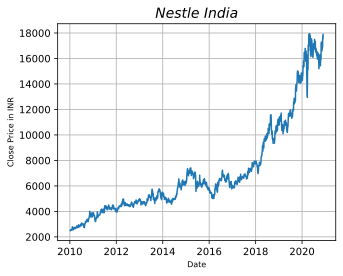

In [71]:
#Plotting Graph for stock price movement over period of time
plt.figure(figsize=(5,4))
plt.plot(df["Close"])
plt.grid()
plt.title('Nestle India',fontsize=14,fontstyle='oblique')
plt.xlabel('Date',fontsize=8)
plt.ylabel('Close Price in INR',fontsize=8)

In [72]:
#Plotting Candelstick Chart for better visulazation
import plotly.graph_objects as go
figure=go.Figure(
data=[
    go.Candlestick(
    x=df.index,
    low=df['Low'],
    high=df['High'],
    open=df['Open'],
        close=df['Close']
    )
])
figure.update_layout(height=900,title='Nestle India Stock Movement',width=950)
figure.show()

## Actions taken for data cleaning and feature engineering
1. Droping unnecessay columns
2. Checking for null values
3. determing and handling outliers
4. boxplot visulaztion after handling outliers
5. MinMaxScaling for feature scaling (In this code 'Close' and 'Prev Close' not scaled as they are used in hypothesis testing)


# DATA CLEANING

In [73]:
#Removing Unnecessay Columns
data=df.drop(['Symbol','Series','Open','High','Low','Last','Trades','Turnover'],axis=1)
data

,Prev Close,Close,VWAP,Volume,Deliverable Volume,%Deliverble
Date,,,,,,
2010-01-08,2512.95,2494.65,2529.81,648,438,0.6759
2010-01-11,2494.65,2498.95,2494.44,825,638,0.7733
2010-01-12,2498.95,2502.85,2485.22,68346,67695,0.9905
2010-01-13,2502.85,2489.35,2491.94,1032,718,0.6957
2010-01-14,2489.35,2568.20,2510.27,330361,329193,0.9965
...,...,...,...,...,...,...
2020-11-23,17460.40,17786.40,17728.10,202645,103387,0.5102
2020-11-24,17786.40,17677.60,17789.68,214497,110883,0.5169
2020-11-25,17677.60,17520.20,17495.98,106508,32375,0.3040


In [74]:
#CHECKING FOR MISSING VALUE
print(data.isnull().any())

Prev Close            False
Close                 False
VWAP                  False
Volume                False
Deliverable Volume    False
%Deliverble           False
dtype: bool


In [75]:
print(data.isna().sum())

Prev Close            0
Close                 0
VWAP                  0
Volume                0
Deliverable Volume    0
%Deliverble           0
dtype: int64


#As there is no missing value in our data, we dont need to perform any replace,fillna,drop row operations

In [76]:
#Checking Similrity b/w of VWAP with Close and Volume
from scipy.spatial import distance,distance_matrix
dst1=distance.minkowski(data['VWAP'].tolist(),data['Close'].tolist(),2)
dst2=distance.minkowski(data['VWAP'].tolist(),data['Volume'].tolist(),2)
dst3=distance.minkowski(data['Close'].tolist(),data['Volume'].tolist(),2)
print(dst1,dst2,dst3)


2470.3125110600904 4161947.8106332244 4161931.479891901


This shows the VWAP vs Volume have almost same similarity as Stock price vs Volume have.

OUTLIER DETECTION

C:\Users\Abhishek Agrawal\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Abhishek Agrawal\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Abhishek Agrawal\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Abhishek Agrawal\miniconda3\lib

<AxesSubplot:xlabel='VWAP'>

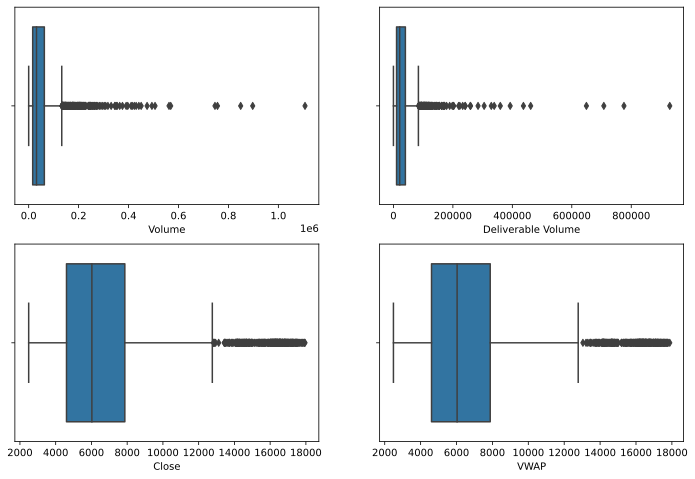

In [77]:
#1. VISULIZATION _ boxplot
fig,ax=plt.subplots(2,2,figsize=(12,8))
sns.boxplot(data['Volume'],ax=ax[0,0])
sns.boxplot(data['Deliverable Volume'],ax=ax[0,1])
sns.boxplot(data['Close'],ax=ax[1,0])
sns.boxplot(data['VWAP'],ax=ax[1,1])

 As we can observe there is outlier present in volume and deliverable volumne we will use z score to remove it

In [78]:
from scipy import stats
import numpy as np
vol = np.abs(stats.zscore(data))
print(np.where(vol>6))

(array([   4,  164,  164,  192,  279,  782,  971,  971, 1037, 1037, 1079,
       1345, 1347, 1394, 2410, 2410, 2563, 2680, 2703, 2703], dtype=int64), array([4, 3, 4, 4, 4, 4, 3, 4, 3, 4, 4, 3, 3, 3, 3, 4, 3, 3, 3, 4],
      dtype=int64))


As we can there are top 20 values with extreme values which may cause problem in future therefore we can either remove the row or replace the extreme values with average
value of the column.
"

In [79]:
#removing Data i.e OUTLIERS
data_new=data[(vol<6).all(axis=1)]

In [80]:
data_new

,Prev Close,Close,VWAP,Volume,Deliverable Volume,%Deliverble
Date,,,,,,
2010-01-08,2512.95,2494.65,2529.81,648,438,0.6759
2010-01-11,2494.65,2498.95,2494.44,825,638,0.7733
2010-01-12,2498.95,2502.85,2485.22,68346,67695,0.9905
2010-01-13,2502.85,2489.35,2491.94,1032,718,0.6957
2010-01-15,2568.20,2513.50,2548.35,8229,7303,0.8875
...,...,...,...,...,...,...
2020-11-20,16934.15,17460.40,17373.27,254010,102374,0.4030
2020-11-23,17460.40,17786.40,17728.10,202645,103387,0.5102
2020-11-24,17786.40,17677.60,17789.68,214497,110883,0.5169


C:\Users\Abhishek Agrawal\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Abhishek Agrawal\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Abhishek Agrawal\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Abhishek Agrawal\miniconda3\lib

<AxesSubplot:xlabel='VWAP'>

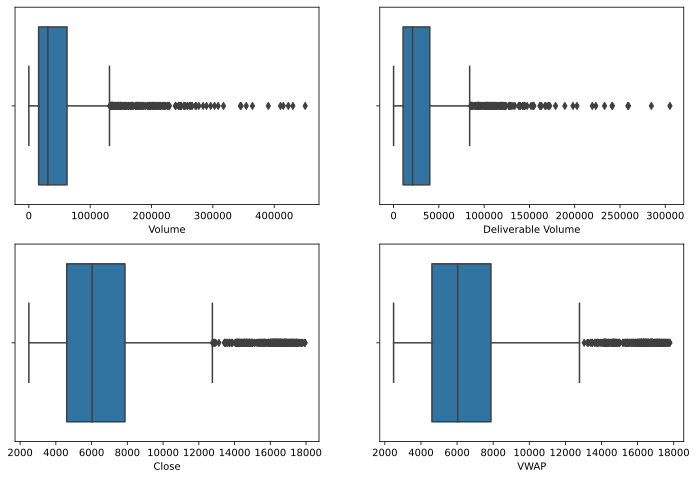

In [81]:
#2.RE- VISULIZATION _ boxplot
fig,ax=plt.subplots(2,2,figsize=(12,8))
sns.boxplot(data_new['Volume'],ax=ax[0,0])
sns.boxplot(data_new['Deliverable Volume'],ax=ax[0,1])
sns.boxplot(data_new['Close'],ax=ax[1,0])
sns.boxplot(data_new['VWAP'],ax=ax[1,1])

# EDA

In [82]:
data_new.describe()

,Prev Close,Close,VWAP,Volume,Deliverable Volume,%Deliverble
count,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000
mean,7133.188211,7138.540461,7140.768873,48969.458163,30680.801785,0.669722
std,3774.317363,3778.566025,3778.564157,52405.575007,30852.369317,0.157627
min,2494.650000,2489.350000,2485.220000,33.000000,32.000000,0.131000
25%,4604.650000,4609.400000,4607.320000,15965.000000,10491.000000,0.560900
50%,6027.400000,6028.350000,6035.880000,31069.000000,20975.000000,0.672200
75%,7863.550000,7869.250000,7877.590000,62266.000000,40013.000000,0.787200
max,17950.800000,17950.800000,17789.680000,450505.000000,305157.000000,0.990900


We can also remove Deliverable Voulme but
'The higher the Percent of Deliverable Quantity to Traded Quantity the better - it indicates that most buyers are expecting the price of the share to go up.'
Therefore it can be useful feature.

In [83]:
#TRANSORMING DATA
#Transformation cann't be done over categorical varibale, but as we don't have one we can apply over all required columns
cols=['Volume','VWAP','Deliverable Volume']
df_scaled = data_new.copy()
features = df_scaled[cols]

In [84]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = data_new.copy()
df_scaled[cols] = scaler.fit_transform(features.values)
df_scaled.head()

,Prev Close,Close,VWAP,Volume,Deliverable Volume,%Deliverble
Date,,,,,,
2010-01-08,2512.95,2494.65,0.002914,0.001365,0.001331,0.6759
2010-01-11,2494.65,2498.95,0.000602,0.001758,0.001986,0.7733
2010-01-12,2498.95,2502.85,0.000000,0.151648,0.221755,0.9905
2010-01-13,2502.85,2489.35,0.000439,0.002218,0.002248,0.6957
2010-01-15,2568.20,2513.50,0.004125,0.018194,0.023830,0.8875


### Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner

1. 'Volume' and 'Deliverable Volume' contains outliers which were handled by removing that row
2.  VWAP vs Volume have almost same similarity as Stock price vs Volume have.
3. Average traded price is Rs. 7138.540461/-
4. data doesn't contain any NULL values

In [85]:
df_scaled.reset_index(inplace=True)
df=df_scaled[df_scaled['%Deliverble']>0.9]
df

,Date,Prev Close,Close,VWAP,Volume,Deliverable Volume,%Deliverble
2,2010-01-12,2498.95,2502.85,0.000000,0.151648,0.221755,0.9905
16,2010-02-03,2560.10,2564.60,0.006168,0.019198,0.027612,0.9742
19,2010-02-06,2549.10,2566.40,0.003470,0.000000,0.000000,0.9697
26,2010-02-17,2701.85,2688.75,0.014674,0.022084,0.029830,0.9151
31,2010-02-24,2552.20,2574.70,0.004321,0.021944,0.029539,0.9120
...,...,...,...,...,...,...,...
1744,2017-01-31,5899.50,5851.85,0.219887,0.505381,0.719092,0.9638
1835,2017-06-14,6690.10,6684.35,0.274564,0.091748,0.122583,0.9050
1903,2017-09-21,7203.35,7146.20,0.304376,0.252204,0.339864,0.9128
1918,2017-10-13,7380.90,7345.40,0.317596,0.400913,0.559715,0.9456


In [86]:
a=df.index.tolist()
a=[x + 1 for x in a]
ini=df_scaled[df_scaled.index==a[0]]
for i in range(1,len(a)):
    ini=ini.append(df_scaled[df_scaled.index==a[i]])
ini

,Date,Prev Close,Close,VWAP,Volume,Deliverable Volume,%Deliverble
3,2010-01-13,2502.85,2489.35,0.000439,0.002218,0.002248,0.6957
17,2010-02-04,2564.60,2568.35,0.005342,0.000908,0.001082,0.8190
20,2010-02-08,2566.40,2645.50,0.010250,0.018088,0.017226,0.6464
27,2010-02-18,2688.75,2651.50,0.012136,0.004817,0.004070,0.5783
32,2010-02-25,2574.70,2559.60,0.005019,0.009392,0.011697,0.8445
...,...,...,...,...,...,...,...
1745,2017-02-01,5851.85,5912.45,0.222350,0.041015,0.039672,0.6557
1836,2017-06-15,6684.35,6687.35,0.274542,0.089546,0.112960,0.8545
1904,2017-09-22,7146.20,7169.55,0.305513,0.037811,0.026297,0.4720
1919,2017-10-16,7345.40,7282.85,0.316323,0.045011,0.037221,0.5608


In [87]:
count=0
for ind in range(0,len(ini.index)):
    if ini.iloc[ind]['Close']>=ini.iloc[ind]['Prev Close']:
        count+=1
print(count)

123


###  Formulating at least 3 hypothesis about this data

1. Greater **Volume** represent greater intraday move of stock . (i.e. High-Low)
2. Stock has never fallen more than 20% from all time high and hit new all time high as long as.
3. whenever %delivery is higher than 50% stock has closed above previous day close.

# Null Hypothesis

I claim that when % Delivery is greater than 0.8 next day price is closed above previous day has probablity >0.5.

How can we test it?

i have preformed an experiment and found that when %delivery is > .9 out of 212, 123 times i have been right i.e prob=0.58

p-value=5%


### Determining the Null and Alternative Hypothesis

Null: **0.5 prob**       ---(It is asummed to be 0.5 as next day stock can close higher or lower than previous day is equally likely given other conditions remain constant)

Alternative: I am right, probability is **greater than 0.5**


In [88]:
cols=['Volume','VWAP','Deliverable Volume']
df_scaled = data_new.copy()
features = df_scaled[cols]
scaler = MinMaxScaler()
df_scaled = data_new.copy()
df_scaled[cols] = scaler.fit_transform(features.values)
df_scaled.reset_index(inplace=True)
df=df_scaled[df_scaled['%Deliverble']>0.8]
a=df.index.tolist()
a=[x + 1 for x in a]
ini=df_scaled[df_scaled.index==a[0]]
for i in range(1,len(a)):
    ini=ini.append(df_scaled[df_scaled.index==a[i]])
count=0
for ind in range(0,len(ini.index)):
    if ini.iloc[ind]['Close']>=ini.iloc[ind]['Prev Close']:
        count+=1
print(count,len(ini))


318 604


In [89]:
from scipy.stats import binom
#318 is number of days where next day close is above previous day close
#604 is no. of days with delivery >.8
#0.5 is probability of closing above previous day
prob = 1 - binom.cdf(318, 604, 0.5)
print(str(round(prob*100, 1))+"%")

9.0%


The probability of getting close above previous day when %delivery is >0.8 is about 9.7%. This is more than 5%, so we can't reject the null and conclude that yes **Stock price will close above previous day close when %Delivery is greater than 0.8**.

###  Suggestions for next steps in analyzing this data
1. scale 'Prev Close' and 'Close' columns using MinMaxScaler
2. Use LSTM model for prediction as this is time series data
3. Visualzie using line chart 

### A paragraph that summarizes the quality of this data set and a request for additional data if needed

Traditionally and in order to predict market
movement, investors used to analyze the
stock prices and stock indicators in addition
to the news related to these stocks.In this work, we
propose an automated trading system that
integrates mathematical functions, machine
learning for the purpose of
achieving better stock prediction accuracy
and issuing profitable trades.

There is lakhs of stock avilable over which analysis can be performed as Fintech is hot subject and futher development will be appreciated.